# Part-of-speech tagging

Part-of-speech (POS) tagging is the process of labeling each word in a text corpus with its grammatical category, such as noun, verb, adjective, etc. POS tagging helps machines understand the structure of text, which in turn proves useful for tasks such as sentiment analysis or text classification.

During this lab we will be using Python, the pandas and NLTK libraries to explore POS tagging techniques and apply them to real-world text data.

Useful nltk PoS documentation - https://www.nltk.org/book/ch05.html

### Intro

In [1]:
# @title Import Prerequisites { display-mode: "form" }
import nltk
import pandas as pd
from IPython.display import display

# Download the necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

print('Imported prerequisites')

Imported prerequisites


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
# @title Tagging demo { display-mode: "form" }

# Sample text
text = "I like to eat pizza and play video games with my friends."
print('Raw text:', text)

# Tokenize the text
tokens = nltk.word_tokenize(text)
print('Tokenized text:', tokens)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)

# Explicitly display the pos_tags in a Jupyter-like format
print()
print('Tagged text:', pos_tags)

Raw text: I like to eat pizza and play video games with my friends.
Tokenized text: ['I', 'like', 'to', 'eat', 'pizza', 'and', 'play', 'video', 'games', 'with', 'my', 'friends', '.']

Tagged text: [('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('pizza', 'NN'), ('and', 'CC'), ('play', 'VB'), ('video', 'NN'), ('games', 'NNS'), ('with', 'IN'), ('my', 'PRP$'), ('friends', 'NNS'), ('.', '.')]


In [3]:
# @title Convert to DataFrame
# Convert PoS tags to a DataFrame
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(pos_df.head())

,Word,PoS
0,I,PRP
1,like,VBP
2,to,TO
3,eat,VB
4,pizza,NN


In [4]:
# @title Count tag frequency
# Count the frequency of each PoS tag and convert it to a dataframe
counts_df = pos_df.groupby('PoS').size().reset_index(name='Count')
display(counts_df)

,PoS,Count
0,.,1
1,CC,1
2,IN,1
3,NN,2
4,NNS,2
5,PRP,1
6,PRP$,1
7,TO,1
8,VB,2
9,VBP,1


NLTK by default uses the Penn Treebank tagset. This tagset is one of the most widely used in English language corpus linguistics. It includes a detailed set of part-of-speech tags, including distinctions among different types of nouns, verbs, adjectives, adverbs, and various punctuation marks, among others.

Here are some examples of tags from the Penn Treebank tagset:

*   NN: Noun, singular or mass
*   NNS: Noun, plural
*   NNP: Proper noun, singular
*   NNPS: Proper noun, plural

**We will, however, switch to the simpler universal_tagset for the remainder of this laboratory.** It helps unify multiple tagsets by allowing conversion from them into the universal_tagset. To do so, simply specify the tagset=universal_tagset when performing tagging.

### POS applied to Jane Austen

In [5]:
# @title Create POS DataFrame { display-mode: "form" }
import requests
import string

# Pride and Prejudice
book_url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
response = requests.get(book_url)
pride_prejudice = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
pride_prejudice = ''.join(c for c in pride_prejudice if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(pride_prejudice)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

# Convert PoS tags to a DataFrame
pride_prejudice_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(pride_prejudice_df)

,Word,PoS
0,The,DET
1,Project,NOUN
2,Gutenberg,NOUN
3,eBook,NOUN
4,of,ADP
...,...,...
130453,to,PRT
130454,hear,VERB
130455,about,ADP
130456,new,ADJ


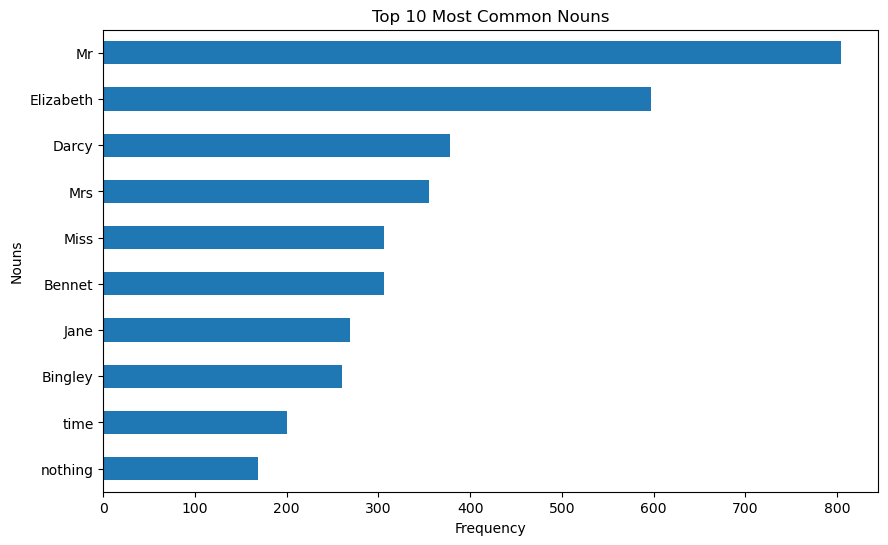

In [6]:
# @title Basic Plotting
import matplotlib.pyplot as plt

# Filter DataFrame for rows where PoS is 'NOUN'
nouns_df = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']

# Count the occurrences of each noun, find top 10
noun_counts = nouns_df['Word'].value_counts()
top_10_nouns = noun_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot
top_10_nouns.plot(kind='barh') # .plot() draws on your canvas, kind = 'barh' decides the plot type, horizontal bar in this case
plt.title('Top 10 Most Common Nouns')
plt.xlabel('Frequency') # Sets the label for the x-axis to 'Frequency'. In a horizontal bar chart, the x-axis typically represents the scale of measurement, which is the frequency of occurrence for each noun in this case.
plt.ylabel('Nouns') # Sets the label for the y-axis to 'Nouns'. Each bar's label on the y-axis corresponds to a noun from your data, identifying what each bar represents.
plt.xticks(rotation=0) # This adjusts the rotation of the tick labels on the x-axis. Setting it to 45 helps in cases where the labels are too large and would overlap.
plt.gca().invert_yaxis()  # Invert y-axis to start with the highest value at the top. gca() gets a matplotlib object representing the plot area, allowing you to modify it directly.
plt.show() # Displays the plot.

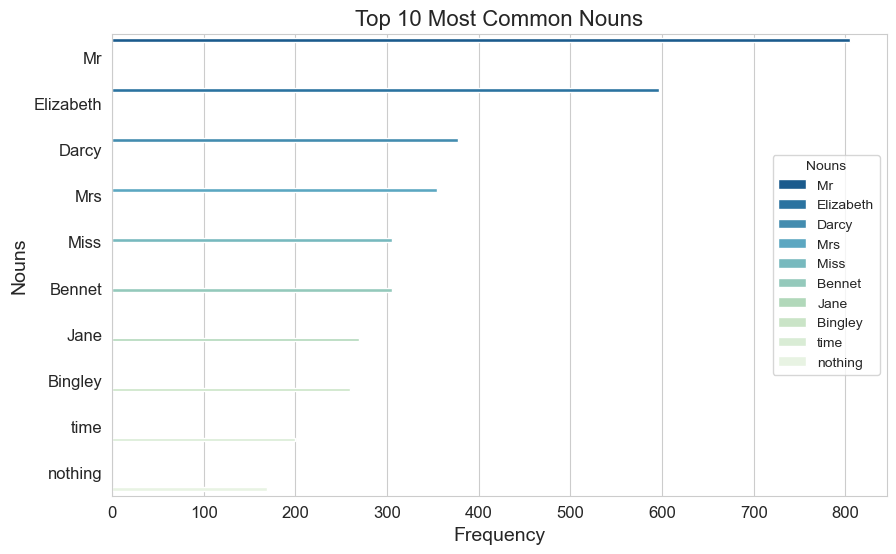

In [7]:
# @title Seaborn Plotting
import seaborn as sns

# Convert the Series to DataFrame for seaborn
top_10_nouns_df = top_10_nouns.reset_index()
top_10_nouns_df.columns = ['Nouns', 'Frequency'] # Converts the Series to a DataFrame and renames columns for clarity, making it compatible with seaborn's data parameter.

# Set the aesthetic style of the plots
sns.set_style("whitegrid") # Applies a white grid background to the plot, providing a clean, modern look that enhances readability.

# Create the plot
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot.
sns.barplot(x='Frequency', y='Nouns', data=top_10_nouns_df, palette="GnBu_r", hue='Nouns') # Draws a horizontal bar plot with 'Nouns' on the y-axis and 'Frequency' on the x-axis. Each noun is colored differently based on the 'Blues_d' palette.

# Add titles and labels
plt.title('Top 10 Most Common Nouns', fontsize=16) # Sets the plot title with a font size of 16.
plt.xlabel('Frequency', fontsize=14) # Sets the label for the x-axis to 'Frequency' with a font size of 14. This label indicates that the x-axis represents the frequency of each noun.
plt.ylabel('Nouns', fontsize=14) # Sets the label for the y-axis to 'Nouns' with a font size of 14. Each bar on the y-axis corresponds to a different noun.
plt.xticks(fontsize=12) # Sets the font size of the x-axis tick labels to 12.
plt.yticks(fontsize=12) # Sets the font size of the y-axis tick labels to 12.

# Show the plot
plt.show() # Displays the plot.

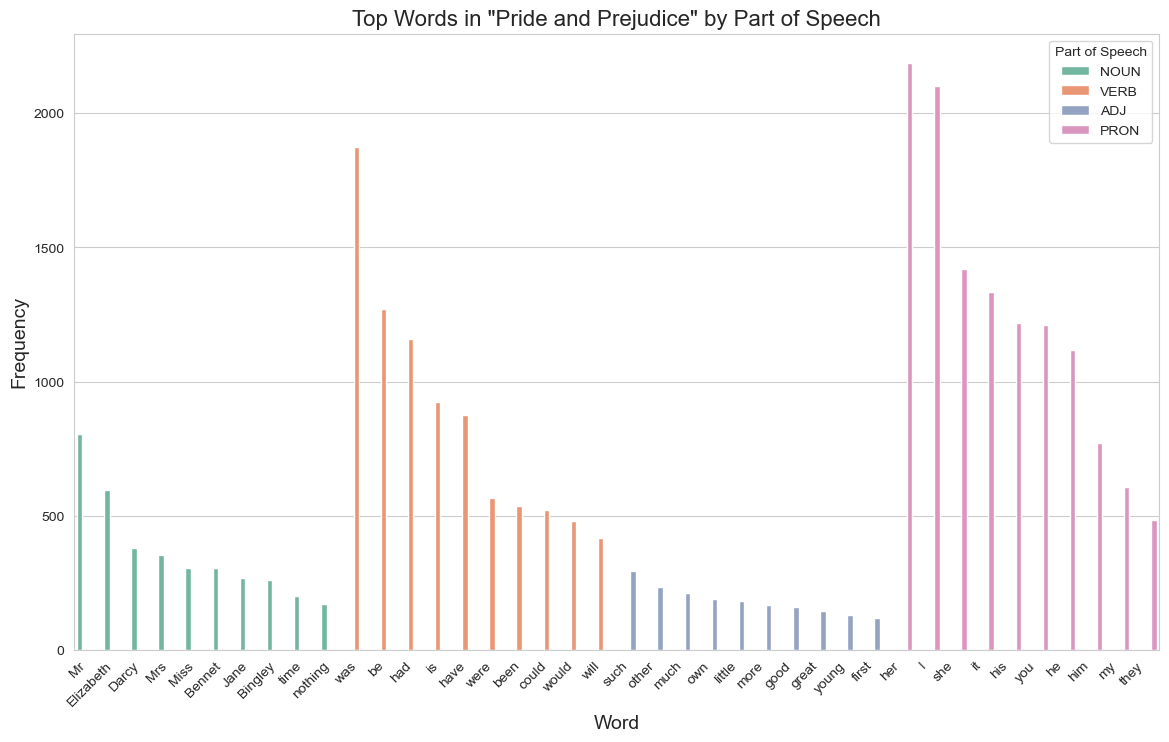

In [8]:
# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
adj_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
pronoun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'PRON']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='NOUN'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='VERB'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='ADJ'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='PRON')
])

# Rename the 'index' column to 'Word' for better readability in the plot
top_words_combined = top_words_combined.rename(columns={'index': 'Word'})

# Plot using 'Word' for the x-axis
plt.figure(figsize=(14, 8))
sns.barplot(x='Word', y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in "Pride and Prejudice" by Part of Speech', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Part of Speech')
plt.show()

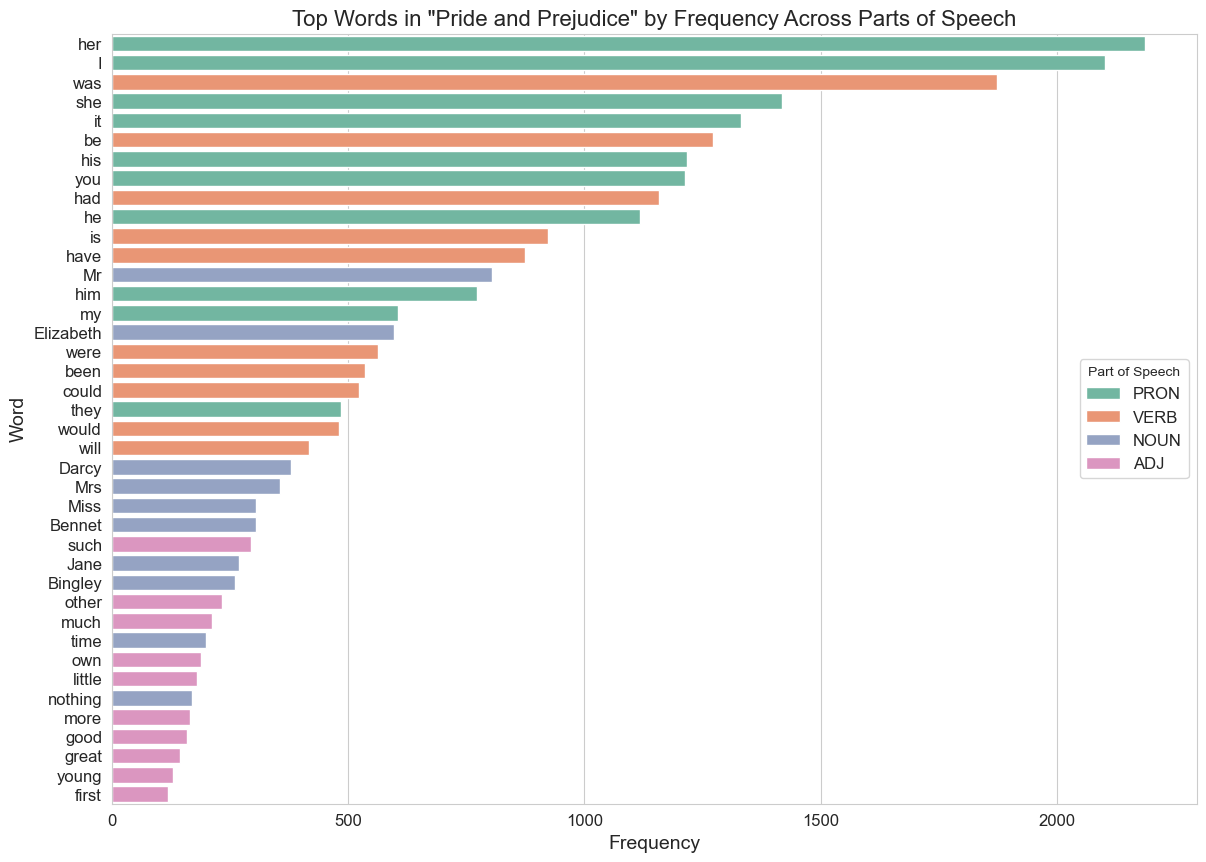

In [9]:
# @title Frequency Sorted Multi-PoS Plot

# Assuming top_words_combined is already created from previous cell
# Sort the DataFrame by 'Frequency' in descending order
top_words_sorted = top_words_combined.sort_values(by='Frequency', ascending=False)

# Plot with sorted values, using 'Word' for the y-axis
plt.figure(figsize=(14, 10))
sns.barplot(y='Word', x='Frequency', hue='PoS', data=top_words_sorted, palette='Set2', dodge=False)  # Use 'Word' for y-axis
plt.title('Top Words in "Pride and Prejudice" by Frequency Across Parts of Speech', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Part of Speech', fontsize=12)
plt.show()

### Exercise 1

 You are going to analyze and compare linguistic features of two texts from different domains.

1. Use two different books to create a dataframe containing columns for 'Word', 'Part of Speech (PoS)', and 'Book'. The 'Book' column should indicate the source book of each word. Ensure you have data from both a scientific text and a literary work.

2. For each book, calculate the percentage of total words that are nouns, verbs, adjectives, and adverbs. This requires counting the occurrences of these parts of speech and dividing by the total number of words in each book.

3. Create two separate plots, one for each book, displaying the top 10 nouns, adjectives, verbs and adverbs appearing in each text.

4. Draw a sorted plot that displays the top 10 words for each book for a PoS of your choice. This plot will contain 20 values (10/book), each value will need to be the relative frequency of the word with respect to its book of origin (word appearances in book / total words in book). Sort the plot by this relative frequency, not by book of origin.

In [10]:
# 1.1
import requests
import string

# Lovecraft
book_url = 'https://www.gutenberg.org/cache/epub/50133/pg50133.txt'
response = requests.get(book_url)
lovecraft = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
lovecraft = ''.join(c for c in lovecraft if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(lovecraft)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

# Convert PoS tags to a DataFrame
lovecraft_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(lovecraft_df[:20])

,Word,PoS
0,The,DET
1,Project,NOUN
2,Gutenberg,NOUN
3,eBook,NOUN
4,of,ADP
5,The,DET
6,Dunwich,NOUN
7,Horror,NOUN
8,This,DET
9,ebook,NOUN


In [11]:
# @title Create POS DataFrame { display-mode: "form" }
import requests
import string

# Scientific writing
book_url = 'https://www.gutenberg.org/cache/epub/57962/pg57962.txt'
response = requests.get(book_url)
sci = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
sci = ''.join(c for c in sci if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(sci)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

# Convert PoS tags to a DataFrame
sci_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(sci_df[:20])

,Word,PoS
0,The,DET
1,Project,NOUN
2,Gutenberg,NOUN
3,eBook,NOUN
4,of,ADP
5,Select,NOUN
6,Specimens,NOUN
7,of,ADP
8,Natural,NOUN
9,History,NOUN


In [12]:
lovecraft_df["Book Title"] = "The Dunwich Horror"
sci_df["Book Title"] = "Select Specimens of Natural History Collected in Travels to Discover the Source of the Nile. Volume 5."

books = [ lovecraft_df, sci_df ]
books_df = pd.concat(books)
books_df

,Word,PoS,Book Title
0,The,DET,The Dunwich Horror
1,Project,NOUN,The Dunwich Horror
2,Gutenberg,NOUN,The Dunwich Horror
3,eBook,NOUN,The Dunwich Horror
4,of,ADP,The Dunwich Horror
...,...,...,...
72768,to,PRT,Select Specimens of Natural History Collected ...
72769,hear,VERB,Select Specimens of Natural History Collected ...
72770,about,ADP,Select Specimens of Natural History Collected ...
72771,new,ADJ,Select Specimens of Natural History Collected ...


In [13]:
# 1.2

wc_df = books_df.groupby(['Book Title']).size().sort_values(ascending=False).reset_index(name='Word Count')
display(wc_df)

,Book Title,Word Count
0,Select Specimens of Natural History Collected ...,72773
1,The Dunwich Horror,20364


In [14]:
counts_df = books_df.groupby(['Book Title','PoS']).size().reset_index(name='PoS Count')
display(counts_df)

,Book Title,PoS,PoS Count
0,Select Specimens of Natural History Collected ...,.,3
1,Select Specimens of Natural History Collected ...,ADJ,5175
2,Select Specimens of Natural History Collected ...,ADP,10662
3,Select Specimens of Natural History Collected ...,ADV,4032
4,Select Specimens of Natural History Collected ...,CONJ,3371
5,Select Specimens of Natural History Collected ...,DET,10323
6,Select Specimens of Natural History Collected ...,NOUN,18347
7,Select Specimens of Natural History Collected ...,NUM,1728
8,Select Specimens of Natural History Collected ...,PRON,5212
9,Select Specimens of Natural History Collected ...,PRT,1664


In [15]:
# Merge the two DataFrames on 'book_title' to get word count in counts_df
merged_df = counts_df.merge(wc_df, on='Book Title')

# Calculate percentage of each POS
merged_df['pos_percentage'] = (merged_df['PoS Count'] / merged_df['Word Count']) * 100

merged_df

,Book Title,PoS,PoS Count,Word Count,pos_percentage
0,Select Specimens of Natural History Collected ...,.,3,72773,0.004122
1,Select Specimens of Natural History Collected ...,ADJ,5175,72773,7.111154
2,Select Specimens of Natural History Collected ...,ADP,10662,72773,14.651038
3,Select Specimens of Natural History Collected ...,ADV,4032,72773,5.540516
4,Select Specimens of Natural History Collected ...,CONJ,3371,72773,4.632212
5,Select Specimens of Natural History Collected ...,DET,10323,72773,14.185206
6,Select Specimens of Natural History Collected ...,NOUN,18347,72773,25.211273
7,Select Specimens of Natural History Collected ...,NUM,1728,72773,2.374507
8,Select Specimens of Natural History Collected ...,PRON,5212,72773,7.161997
9,Select Specimens of Natural History Collected ...,PRT,1664,72773,2.286562


In [16]:
# 1.3

# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = lovecraft_df[lovecraft_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = lovecraft_df[lovecraft_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
adj_counts = lovecraft_df[lovecraft_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
adv_counts = lovecraft_df[lovecraft_df['PoS'] == 'ADV']['Word'].value_counts().head(10)

top_words_combined_lc = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='NOUN'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='VERB'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='ADJ'),
    adv_counts.rename('Frequency').reset_index().assign(PoS='ADV')
])

noun_counts = sci_df[sci_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = sci_df[sci_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
adj_counts = sci_df[sci_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
adv_counts = sci_df[sci_df['PoS'] == 'ADV']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined_sci = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='NOUN'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='VERB'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='ADJ'),
    adv_counts.rename('Frequency').reset_index().assign(PoS='ADV')
])

# Rename the 'index' column to 'Word' for better readability in the plot
top_words_combined_lc = top_words_combined_lc.rename(columns={'index': 'Word'})
top_words_combined_sci = top_words_combined_sci.rename(columns={'index': 'Word'})


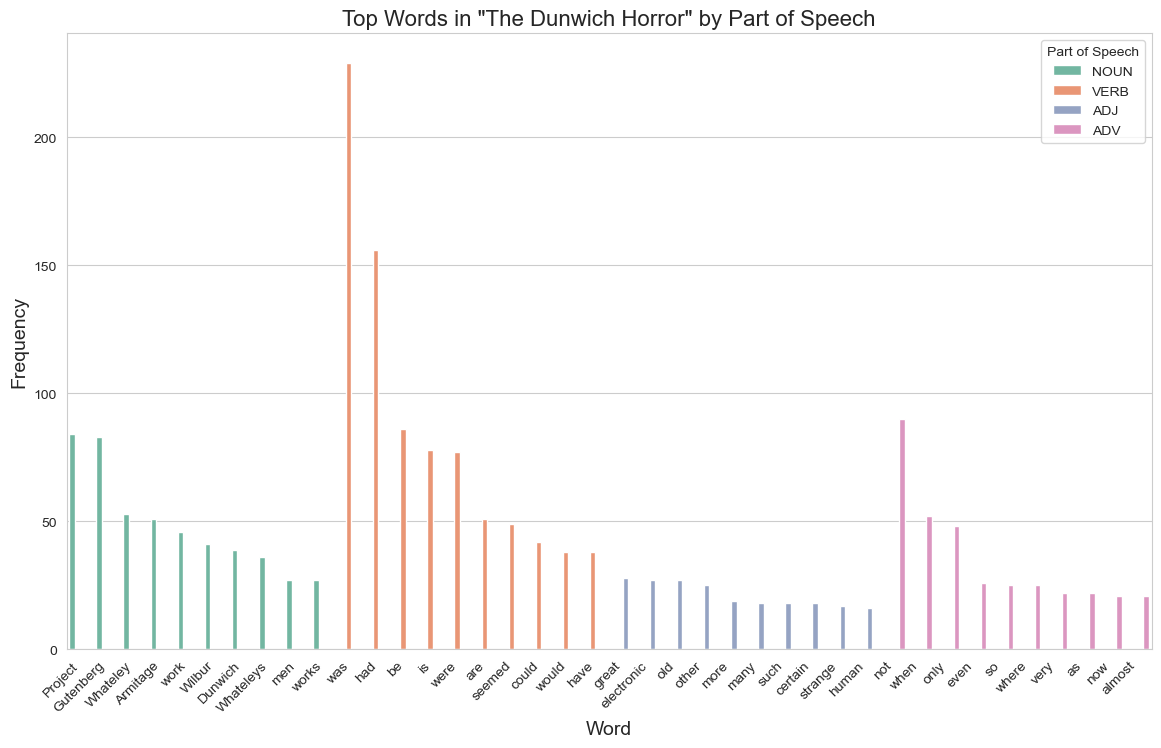

In [17]:
# Plot using 'Word' for the x-axis
plt.figure(figsize=(14, 8))
sns.barplot(x='Word', y='Frequency', hue='PoS', data=top_words_combined_lc, palette='Set2')
plt.title('Top Words in "The Dunwich Horror" by Part of Speech', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Part of Speech')
plt.show()

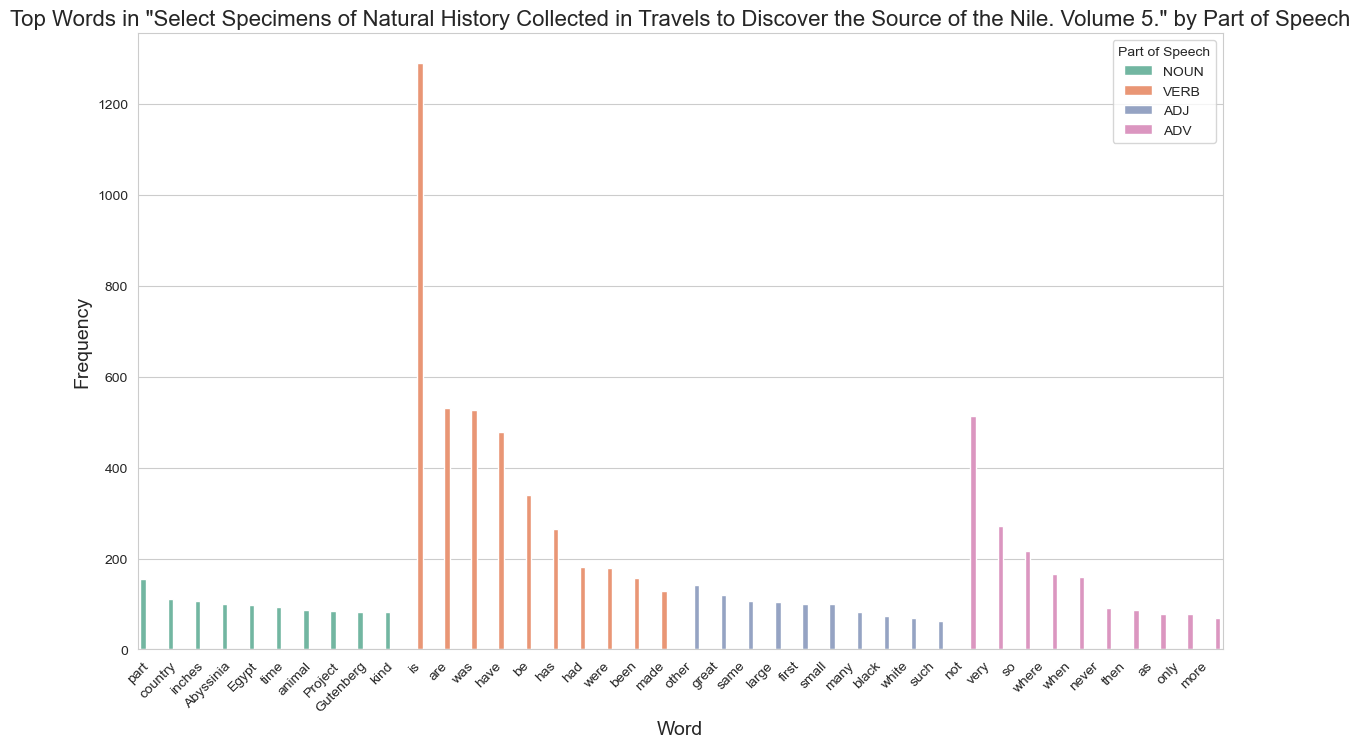

In [18]:
# Plot using 'Word' for the x-axis
plt.figure(figsize=(14, 8))
sns.barplot(x='Word', y='Frequency', hue='PoS', data=top_words_combined_sci, palette='Set2')
plt.title('Top Words in "Select Specimens of Natural History Collected in Travels to Discover the Source of the Nile. Volume 5." by Part of Speech', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Part of Speech')
plt.show()

In [19]:
# 1.4

total_words_per_book = books_df.groupby("Book Title")["Word"].count().rename("total_words")

word_counts = books_df.groupby(["Book Title", "Word"]).size().reset_index(name="word_count")

word_counts = word_counts.merge(total_words_per_book, on="Book Title")
word_counts["rel_freq"] = word_counts["word_count"] / word_counts["total_words"]

word_counts.sort_values(ascending=False,by="rel_freq")

,Book Title,Word,word_count,total_words,rel_freq
7820,Select Specimens of Natural History Collected ...,the,4965,72773,0.068226
12846,The Dunwich Horror,the,1388,20364,0.068159
6003,Select Specimens of Natural History Collected ...,of,3406,72773,0.046803
11685,The Dunwich Horror,of,721,20364,0.035406
9416,The Dunwich Horror,and,665,20364,0.032656
...,...,...,...,...,...
4946,Select Specimens of Natural History Collected ...,hottest,1,72773,0.000014
4947,Select Specimens of Natural History Collected ...,hounds,1,72773,0.000014
4949,Select Specimens of Natural History Collected ...,hours,1,72773,0.000014
4954,Select Specimens of Natural History Collected ...,howling,1,72773,0.000014


In [20]:
wc_df = word_counts.drop(["word_count","total_words"],axis=1)

df = pd.merge(
    books_df, 
    wc_df, 
    on=['Book Title', 'Word'],
    how='inner'
)

df = df.drop_duplicates(keep='first')
df

,Word,PoS,Book Title,rel_freq
0,The,DET,The Dunwich Horror,0.004321
88,Project,NOUN,The Dunwich Horror,0.004125
172,Gutenberg,NOUN,The Dunwich Horror,0.004076
255,eBook,NOUN,The Dunwich Horror,0.000442
264,of,ADP,The Dunwich Horror,0.035406
...,...,...,...,...
93132,main,ADJ,Select Specimens of Natural History Collected ...,0.000014
93133,PG,NOUN,Select Specimens of Natural History Collected ...,0.000014
93134,includes,VERB,Select Specimens of Natural History Collected ...,0.000014
93135,subscribe,VERB,Select Specimens of Natural History Collected ...,0.000014


In [21]:
pos_choice = "ADJ"
pos_df = df[df["PoS"] == pos_choice]

top_words_df = pos_df.groupby('Book Title').apply(lambda x: x.nlargest(10, 'rel_freq'))

sorted_words = top_words_df.reset_index(drop=True).sort_values(by='rel_freq', ascending=False)

sorted_words

,Word,PoS,Book Title,rel_freq
0,very,ADJ,Select Specimens of Natural History Collected ...,0.003751
1,upon,ADJ,Select Specimens of Natural History Collected ...,0.003325
10,only,ADJ,The Dunwich Horror,0.002455
2,ii,ADJ,Select Specimens of Natural History Collected ...,0.002391
3,other,ADJ,Select Specimens of Natural History Collected ...,0.001938
11,more,ADJ,The Dunwich Horror,0.001915
4,i,ADJ,Select Specimens of Natural History Collected ...,0.001910
5,first,ADJ,Select Specimens of Natural History Collected ...,0.001855
6,more,ADJ,Select Specimens of Natural History Collected ...,0.001814
7,great,ADJ,Select Specimens of Natural History Collected ...,0.001649


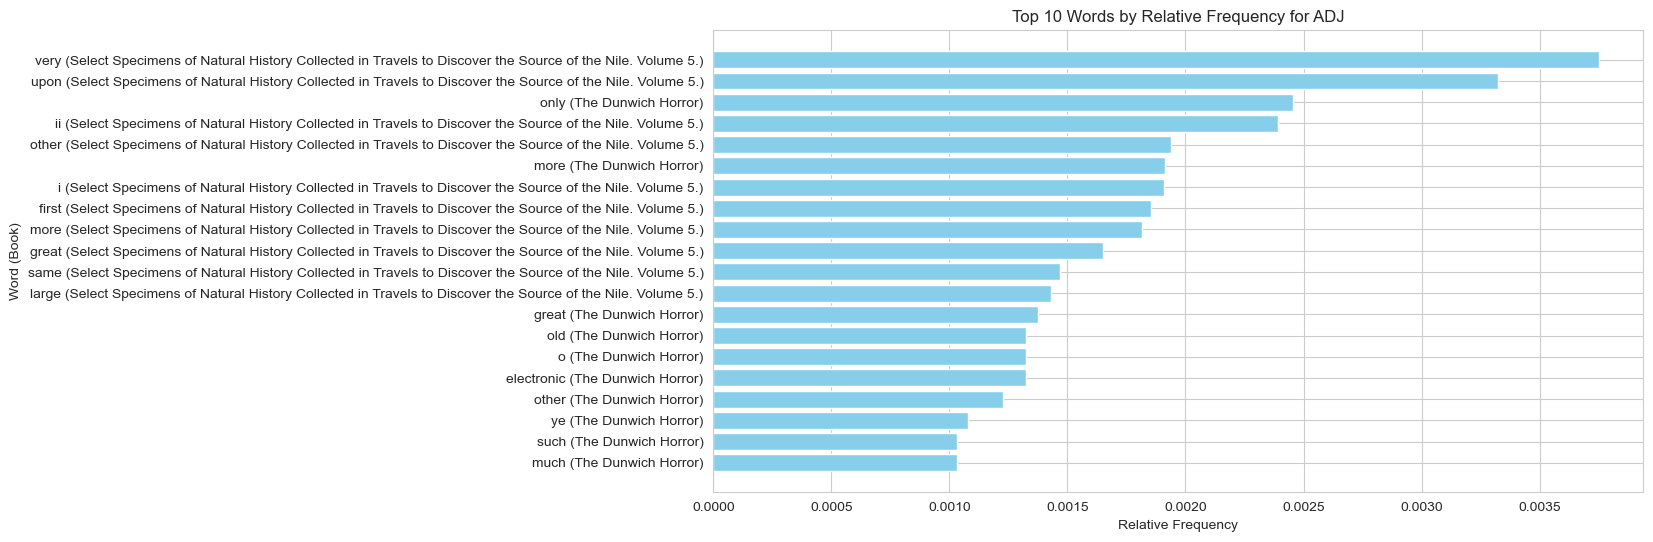

In [22]:
# Create labels combining word and book title
sorted_words['label'] = sorted_words['Word'] + ' (' + sorted_words['Book Title'] + ')'

# Plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_words['label'], sorted_words['rel_freq'], color='skyblue')
plt.xlabel('Relative Frequency')
plt.ylabel('Word (Book)')
plt.title(f'Top 10 Words by Relative Frequency for {pos_choice}')
plt.gca().invert_yaxis()
plt.show()

# Named Entity Recognition

**Named Entity Recognition (NER) is a Natural Language Processing (NLP) technique that involves identifying and classifying named entities in text into predefined categories such as person names, organization names, locations, medical codes, etc.**

This extraction of relevant information about entities from text documents can prove useful in tasks such as information retrieval, question answering, text summarization, sentiment analysis, and more.

Nltk has some built-in NER functionality, but it is slower and relatively old, making it quite far from state of the art. For this reason we are going to use a faster and more power library called **spacy**.

Useful spacy documentation - https://spacy.io/usage/linguistic-features

In [23]:
# @title Import spacy and its NER model { display-mode: "form" }
# Remove comment below if spacy is not installed
# !pip install --quiet spacy

# Spacy has 3 CPU-optimized en_core_web models: sm (small - 12MB), md (medium - 40MB), lg (large - 560MB)
!python -m spacy download en_core_web_sm --quiet # Install the smallest en_core_web NER model
# Can replace with any of the larger ones if not bottlenecked by network/cpu
!python -m spacy download en_core_web_sm
import spacy

# Load the pre-trained model
spacy.info("en_core_web_sm")
nlp = spacy.load('en_core_web_sm') # Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

ERROR: Invalid requirement: '#'


     ---------------------------------------- 12.8/12.8 MB 1.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
# @title NER Demo { display-mode: "form" }
from spacy import displacy

# Define the text to be analyzed
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process the text with spaCy into a doc object
doc = nlp(text)

# Each word from our doc is a spacy Token object with plenty of useful attributes associated to it - https://spacy.io/api/token#attributes
for token in doc:
    print('First token:', token.text, token.pos_, token.ent_type_) # word, part of speech, entity (where available)
    break # we'll stop at first token

# Generate a highlighted visualization of the named entities in the text using displacy
displacy.render(doc, style='ent', jupyter=True)

First token: Apple PROPN ORG


In [25]:
# @title Redact names with NER
# Define the text to be analyzed
before_text = "John Smith is a software engineer at Google. He works with Emily White, a data scientist from Boston. Their work involves handling data from European clients."
after_text = before_text

# Process the text with spaCy
doc = nlp(before_text)

# Entities to redact
entities_to_redact = ['PERSON', 'ORG', 'GPE', 'NORP']

# Create a list to hold redacted entities to handle overlaps and repetitions
redactions = []

# Iterate over each named entity in the document
for ent in doc.ents:
    # If the named entity is of a type that needs to be redacted
    if ent.label_ == 'PERSON' and ent.text not in redactions:
        after_text = after_text.replace(ent.text, '[REDACTED]')
        redactions.append(ent.text)  # Add to redactions list to avoid repeat replacements

print("Before Redaction:")
print(before_text)

print("After Redaction:")
print(after_text)

Before Redaction:
John Smith is a software engineer at Google. He works with Emily White, a data scientist from Boston. Their work involves handling data from European clients.
After Redaction:
[REDACTED] is a software engineer at Google. He works with [REDACTED], a data scientist from Boston. Their work involves handling data from European clients.


### Exercise 2 - Play a game with your colleagues

Find an English wikipedia article about a famous person, character, organization or event of your choice.


**Redact 4 entity types of your choice from the text.**


**Show the final (redacted) text to a colleague and see if they can tell who the wiki page is about.**

Below you have an example of how to get a wikipedia article based on id and access its content. [Here](https://www.kaggle.com/code/curiousprogrammer/entity-extraction-and-classification-using-spacy?cellId=9&cellIds=9&kernelSessionId=11364473#SpaCy-recognizes-the-following-built-in-entity-types:) you can find the entities supported by spacy, scroll down if not auto-routed.

In [26]:
# We'll use the wikipedia python package to get our page
!pip install wikipedia --quiet

In [27]:
# @title Wiki Example { vertical-output: true, display-mode: "both" }
import wikipedia

# Fetch a wiki page
page = wikipedia.page(pageid='51853') # Example ID for John Doe, find ID by going to Tools -> Page Information -> Page ID

content = page.content
display(content)

'John Doe (male) and Jane Doe (female) are multiple-use placeholder names that are used in the British and American legal system and assigned generally in the United Kingdom and the United States when the true name of a person is unknown or is being intentionally concealed. In the context of law enforcement in the United States, such names are often used to refer to a corpse whose identity is unknown or cannot be confirmed. These names are also often used to refer to a hypothetical "everyman" in other contexts, like John Q. Public or "Joe Public". There are many variants to the above names, including John (or Richard)/Jane Roe, John/Jane Smith, John/Jane Bloggs, and Johnie/Janie Doe or just Baby Doe for children. A. N. Other is also a placeholder name, mainly used in the United Kingdom – which is gender neutral – alongside Joe/Jo Bloggs and the now occasional use of the "John" and "Jane Doe" names.\n\n\n== In criminal investigation ==\nIn other English-speaking countries, unique placeh

In [28]:

page = wikipedia.page(pageid='16779') # Example ID for John Doe, find ID by going to Tools -> Page Information -> Page ID

content = page.content

redacted = content

doc = nlp(content)
entities_to_redact = ['PERSON', 'ORG', 'GPE', 'MONEY']

# Create a list to hold redacted entities to handle overlaps and repetitions
redactions = []

# Iterate over each named entity in the document
for ent in doc.ents:
    # If the named entity is of a type that needs to be redacted
    if ent.label_ in entities_to_redact and ent.text not in redactions:
        redacted = redacted.replace(ent.text, '[REDACTED]')
        redactions.append(ent.text)  # Add to redactions list to avoid repeat replacements

print(redacted[:2000])


[REDACTED] (), commonly shortened to the [REDACTED] or the [REDACTED], is an [REDACTED]n Protestant-led Christian extremist, white supremacist, far-right hate group. It was founded in 1865 during [REDACTED] in the devastated South. Various historians have characterized the [REDACTED] as [REDACTED]'s first terrorist group. The group contains several organizations structured as a secret society, which have frequently resorted to terrorism, violence and acts of intimidation to impose their criteria and oppress their victims, most notably African [REDACTED]ns, Jews, and Catholics. A leader of one of these organizations is called a grand wizard, and there have been three distinct iterations with various other targets relative to time and place.
The first [REDACTED] was established in the [REDACTED] era for men opposed to Radical [REDACTED] and founded by [REDACTED] veterans that assaulted and murdered politically active [REDACTED] people and their white political allies in the South. Federa

### Word dependency parsing
Dependency parsing can be used to extract specific information from a text, such as the subject and object of a sentence or the relationship between two entities. This information can be used to get structured data from unstructured text, which can be useful for tasks such as question answering, knowledge graph construction, etc.



In [29]:
# @title Token dependency demo
sentence = "The cat sat on the mat."

doc = nlp(sentence)

displacy.render(doc, style="dep", options={"compact": True}, jupyter=True)

for token in doc:
    print('Token -', token.text)
    print('Dependency -', token.dep_)
    print('Connected token -', token.head.text)
    break

Token - The
Dependency - det
Connected token - cat


In [30]:
# @title Naive question generator { display-mode: "form" }
def generate_question(sentence):
    # Process the input sentence with spaCy to get a Doc object containing linguistic annotations
    doc = nlp(sentence)

    # Initialize variables to hold the subject, verb, and object found in the sentence
    subject = None
    verb = None
    obj = None

    # Iterate over each token (word) in the processed sentence
    for token in doc:
        # If the token's dependency label is 'nsubj' (nominal subject), store its text as the subject
        if token.dep_ == "nsubj":
            subject = token.text
        # If the token is the root of the sentence (main verb), store its lemma as the verb
        # The lemma is the base form of the word, ensuring consistency (e.g., "run" instead of "runs" or "running")
        elif token.dep_ == "ROOT":
            verb = token.lemma_
        # If the token's dependency label is 'dobj' (direct object), store its text as the object
        elif token.dep_ == "dobj":
            obj = token.text

    # Check if both subject and verb were found in the sentence
    if subject is not None and verb is not None:
        # If an object is also found, formulate a question asking what the subject did (verb) to the object
        if obj is not None:
            question = f"What did {subject} {verb}?"
        # If no object is found, formulate a more general question about what the subject does
        else:
            question = f"What does {subject} {verb}?"
        # Return the generated question
        return question
    else:
        # If no subject or verb could be identified, indicate that a question cannot be generated
        print("No subject or verb found")
        return None

# Example usage of the function
input_sentence = "Michael sent her flowers"
# Call the function with the input sentence and store the generated question
question = generate_question(input_sentence)
# Print the generated question
print("Generated question:", question)

Generated question: What did Michael send?


### Exercise 3
Create a text summarizer using NER and dependency parsing.

1. Implement a Key Sentence Extractor:

    Use spaCy to process a given text and identify the most important sentences based on number of named entity occurences.
    Extract the top 10% (can make this parameter adjustable) of sentences deemed most important and return them as a list.

2. Summarize Extracted Sentences:
    *  For each sentence extracted in Part 1, further process it to identify its main subject, verb (root), and direct object (if present) using spaCy's dependency parsing.
    *  Construct a simplified summary sentence that uses these 3 components that should capture the essence of the original sentence.
    *  Return a list of these summarized sentences.
3. Extend the Summarization to add more useful information.

    Enhance your summarization function from Part 2 to also consider and include prepositional phrases or indirect objects related to the main verb, aiming to add more context and detail to each summary sentence.


In [31]:
import spacy
import math

def extract_key_sentences(text, top_percent=50):
    """Extract the top percentage of key sentences based on named entity occurrences."""
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    
    # Count named entity occurrences per sentence
    sentence_scores = {}
    for sent in doc.sents:
        entity_count = sum(1 for _ in sent.ents)
        sentence_scores[sent] = entity_count
    
    # Get top sentences based on entity occurrences
    num_sentences = max(1, math.ceil(len(sentence_scores) * (top_percent / 100)))
    sorted_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    key_sentences = sorted_sentences[:num_sentences]
    
    return key_sentences

def summarize_sentence(sentence):
    """Summarize a sentence by extracting only the subject, root verb, and direct object."""
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence.text)
    subject = None
    root = None
    dobj = None
    
    for token in doc:
        if "nsubj" == token.dep_:
            subject = token.text
        if token.dep_ == "ROOT":
            root = token.text
        if "dobj" == token.dep_:
            dobj = token.text
    
    summary = " ".join(filter(None, [subject, root, dobj]))
    return summary

def advanced_summarize_sentence(sentence):
    """Enhance summarization by including prepositional phrases and indirect objects."""
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence.text)
    subject = None
    root = None
    dobj = None
    extra_info = []
    
    for token in doc:
        if "nsubj" == token.dep_:
            subject = token.text
        if token.dep_ == "ROOT":
            root = token.text
        if "dobj" == token.dep_:
            dobj = token.text
        if token.dep_ in {"prep", "pobj", "advmod", "amod", "iobj"}:  # More detailed context
            extra_info.append(token.text)
    
    summary = " ".join(filter(None, [subject, root, dobj] + extra_info))
    return summary

def summarize_text(text, top_percent=50):
    """Extract key sentences, generate a summarized version, and an advanced summary."""
    key_sentences = extract_key_sentences(text, top_percent)
    summarized_sentences = [summarize_sentence(sent) for sent in key_sentences]
    advanced_summaries = [advanced_summarize_sentence(sent) for sent in key_sentences]
    
    return {
        "key_sentences": key_sentences,
        "summary": summarized_sentences,
        "advanced_summary": advanced_summaries
    }

# Example usage:
text = """
Google, based in Mountain View, unveiled the new Pixel at a conference in New York.
Sundar Pichai, CEO of Google, announced the product.
The conference was attended by over 5,000 people, including journalists from major tech publications.
Meanwhile, Apple has been silent about its upcoming products, sparking speculation among fans.
"""

summary_data = summarize_text(text, top_percent=50)
print("Key Sentences:")
print("\n".join([sent.text for sent in summary_data["key_sentences"]]))
print("\nSummary of Key Sentences:")
print("\n".join(summary_data["summary"]))
print("\nAdvanced Summary of Key Sentences:")
print("\n".join(summary_data["advanced_summary"]))


Key Sentences:

Google, based in Mountain View, unveiled the new Pixel at a conference in New York.

Sundar Pichai, CEO of Google, announced the product.


Summary of Key Sentences:
Google unveiled Pixel
Pichai announced product

Advanced Summary of Key Sentences:
Google unveiled Pixel in View new at conference in York
Pichai announced product of Google


# Exercise 4
Explore patterns in text through PoS/NER tagging.

1. Construct a dataframe from **four long-form texts** (>5000 words), each coming from distinct genres (e.g., fiction, non-fiction, academic, history, etc.). The dataframe should contain the **genre, word, NER and PoS columns**.

    NER column will contain the **entity type** of the word (e.g. person, date) obtained using spacy, PoS column will contain the **PoS tag** of the word (e.g. verb, noun) obtained using spacy or nltk.

2. Select a part of speech of your choice (e.g. VERB, ADJECTIVE, ..) and plot the top 10 word occurrences for that POS for each genre. Can use 4 separate plots or do it all in one.

3. Compute and plot the frequency of all different entity types **grouped by genre**. Visualize this distribution with a bar chart, highlighting which entities are most common in different domains. You can use either absolute (number of occurrences) or relative values (number of occurrences / total words in genre) in your visualizations. Similarly to 4.2, design of the plot is up to you.

4. Calculate and plot the distribution of POS tags among genres.  Use a pie chart to illustrate the proportion of different parts of speech, providing insights into the linguistic preferences of each domain's texts. Absolute or relative values are again up for choice. One or 4 plots up for choice.


In [34]:
# 4.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from collections import Counter
import re
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import string

# Download needed resources
nltk.download('punkt')
nltk.download('gutenberg')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to create dataframe from texts
def create_text_df(texts_dict):
    all_data = []
    
    for genre, text in texts_dict.items():
        # Process with spaCy
        doc = nlp(text)
        
        for token in doc:
            # Skip punctuation and whitespace
            if token.is_punct or token.is_space:
                continue
                
            # Get entity type if available, 'O' otherwise
            entity_type = token.ent_type_ if token.ent_type_ else 'O'
            
            all_data.append({
                'genre': genre,
                'word': token.text.lower(),
                'NER': entity_type,
                'PoS': token.pos_
            })
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    return df

# Function to fetch text from Project Gutenberg
def get_gutenberg_text(book_url):
    response = requests.get(book_url)
    book = response.text
    allowed_chars = string.ascii_letters + string.digits + string.whitespace
    book = ''.join(c for c in book if c in allowed_chars)
    return book

# Get texts from different sources
texts = {
    'fiction': get_gutenberg_text('https://www.gutenberg.org/cache/epub/21839/pg21839.txt'),  # Fiction: Jane Austen's Sense and Sensibility
    'non-fiction': get_gutenberg_text('https://www.gutenberg.org/cache/epub/1228/pg1228.txt'),  # Non-fiction: Darwin's Origin of Species
    'academic': get_gutenberg_text('https://www.gutenberg.org/cache/epub/40794/pg40794.txt'),  # Academic: Essays in Experimental Logic
    'history': get_gutenberg_text('https://www.gutenberg.org/cache/epub/14764/pg14764.txt')  # History: The Grey Book
}

# Create dataframe
df = create_text_df(texts)

df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Word counts per genre:


,genre,word,NER,PoS
0,fiction,the,O,DET
1,fiction,project,O,PROPN
2,fiction,gutenberg,O,PROPN
3,fiction,ebook,O,PROPN
4,fiction,of,O,ADP
...,...,...,...,...
530931,history,to,O,PART
530932,history,hear,O,VERB
530933,history,about,O,ADP
530934,history,new,O,ADJ


In [40]:
print("Word counts per genre:")
print(df['genre'].value_counts())

Word counts per genre:
non-fiction    158707
history        134599
fiction        125029
academic       112601
Name: genre, dtype: int64


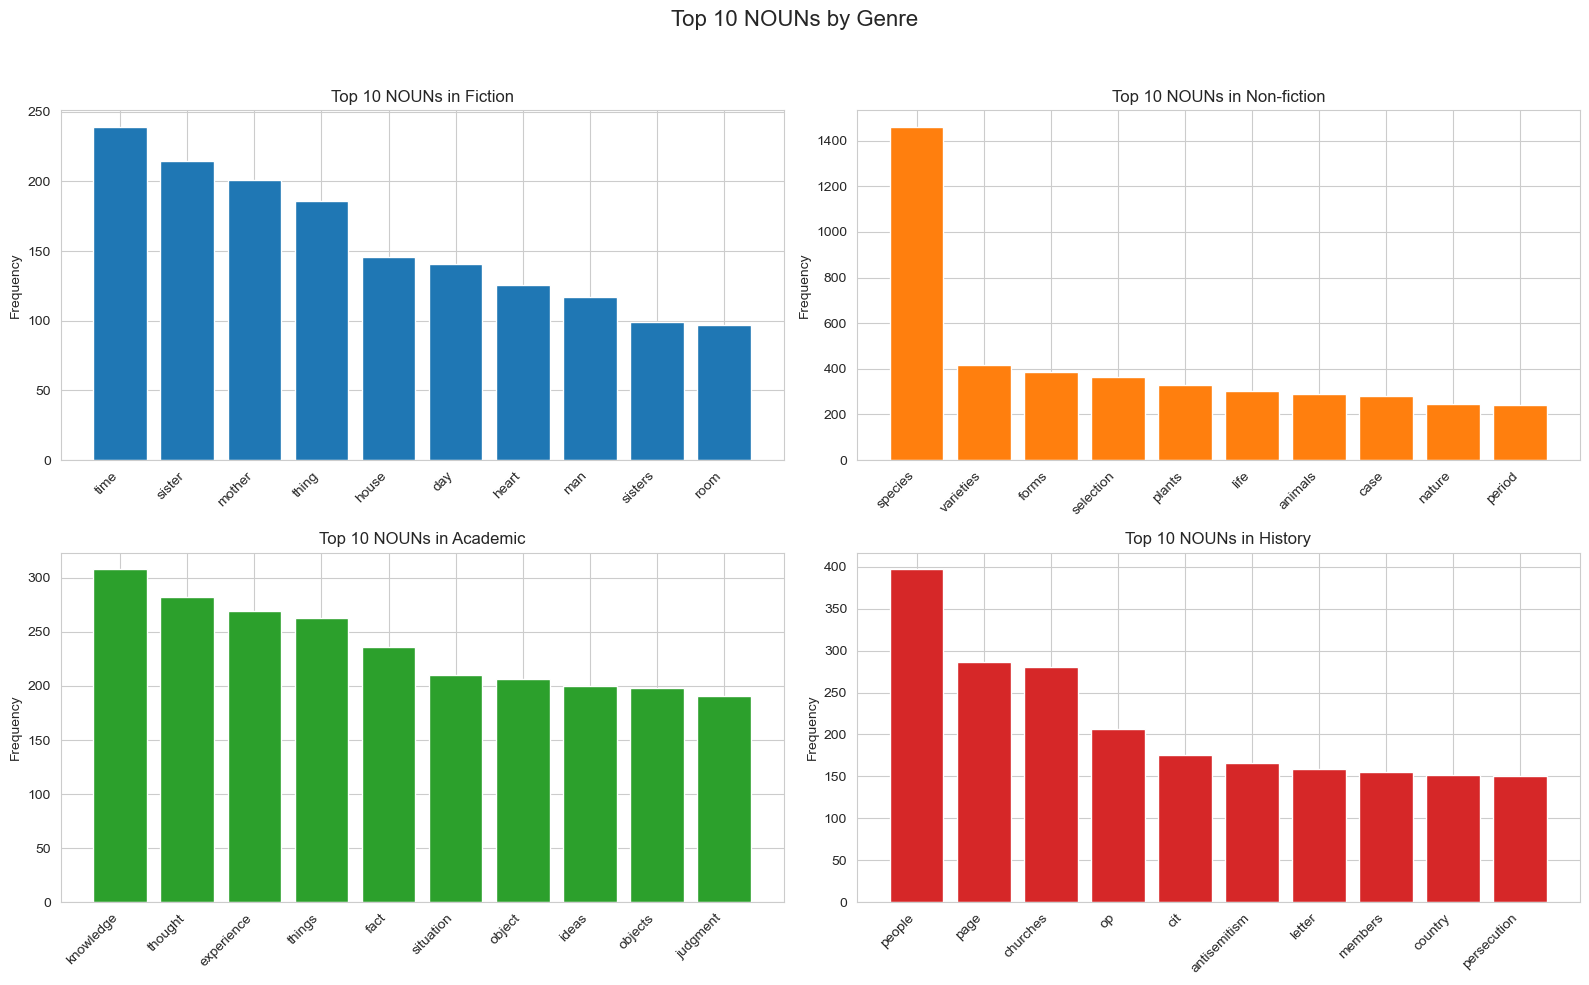

In [36]:

# 4.2

def plot_top_pos_by_genre(df, pos='VERB'):
    plt.figure(figsize=(16, 10))
    
    for i, genre in enumerate(df['genre'].unique(), 1):
        plt.subplot(2, 2, i)
        
        genre_pos_df = df[(df['genre'] == genre) & (df['PoS'] == pos)]
        
        word_counts = Counter(genre_pos_df['word'])
        top_words = dict(word_counts.most_common(10))
        
        # Create bar plot
        plt.bar(top_words.keys(), top_words.values(), color=f'C{i-1}')
        plt.title(f'Top 10 {pos}s in {genre.capitalize()}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
    
    plt.suptitle(f'Top 10 {pos}s by Genre', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
plot_top_pos_by_genre(df, pos='NOUN')

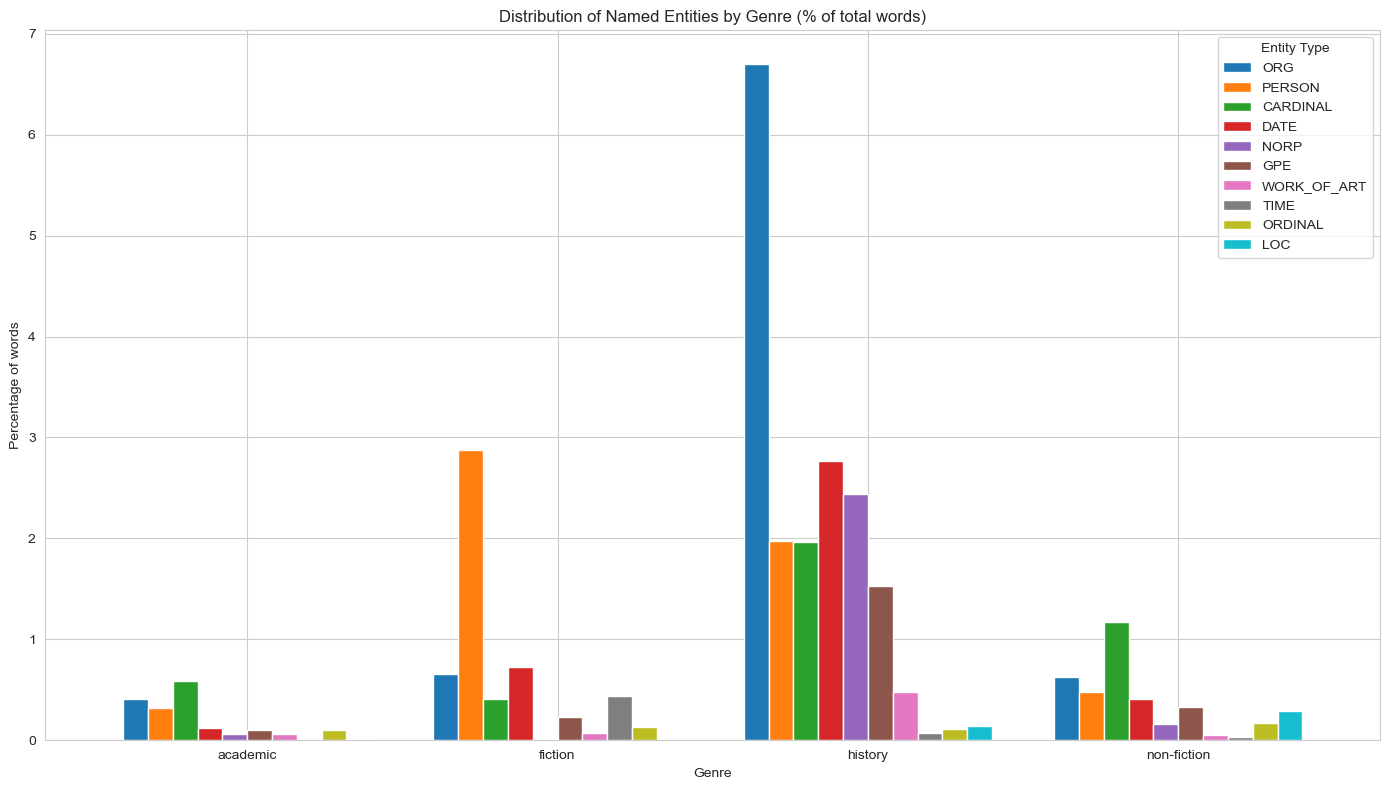

In [44]:
# 4.3

def plot_entity_distribution(df):
    
    entity_counts = df.groupby(['genre', 'NER']).size().unstack(fill_value=0)
    
    total_words = df.groupby('genre').size()
    entity_freq = entity_counts.div(total_words, axis=0) * 100  # As percentage
    
    if 'O' in entity_freq.columns:
        entity_freq = entity_freq.drop('O', axis=1)
    
    relevant_entities = entity_freq.sum().sort_values(ascending=False).head(10).index
    entity_freq = entity_freq[relevant_entities]
    
    # Plot
    entity_freq.plot(kind='bar', figsize=(14, 8), width=0.8)
    plt.title('Distribution of Named Entities by Genre (% of total words)')
    plt.ylabel('Percentage of words')
    plt.xlabel('Genre')
    plt.legend(title='Entity Type')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
plot_entity_distribution(df)

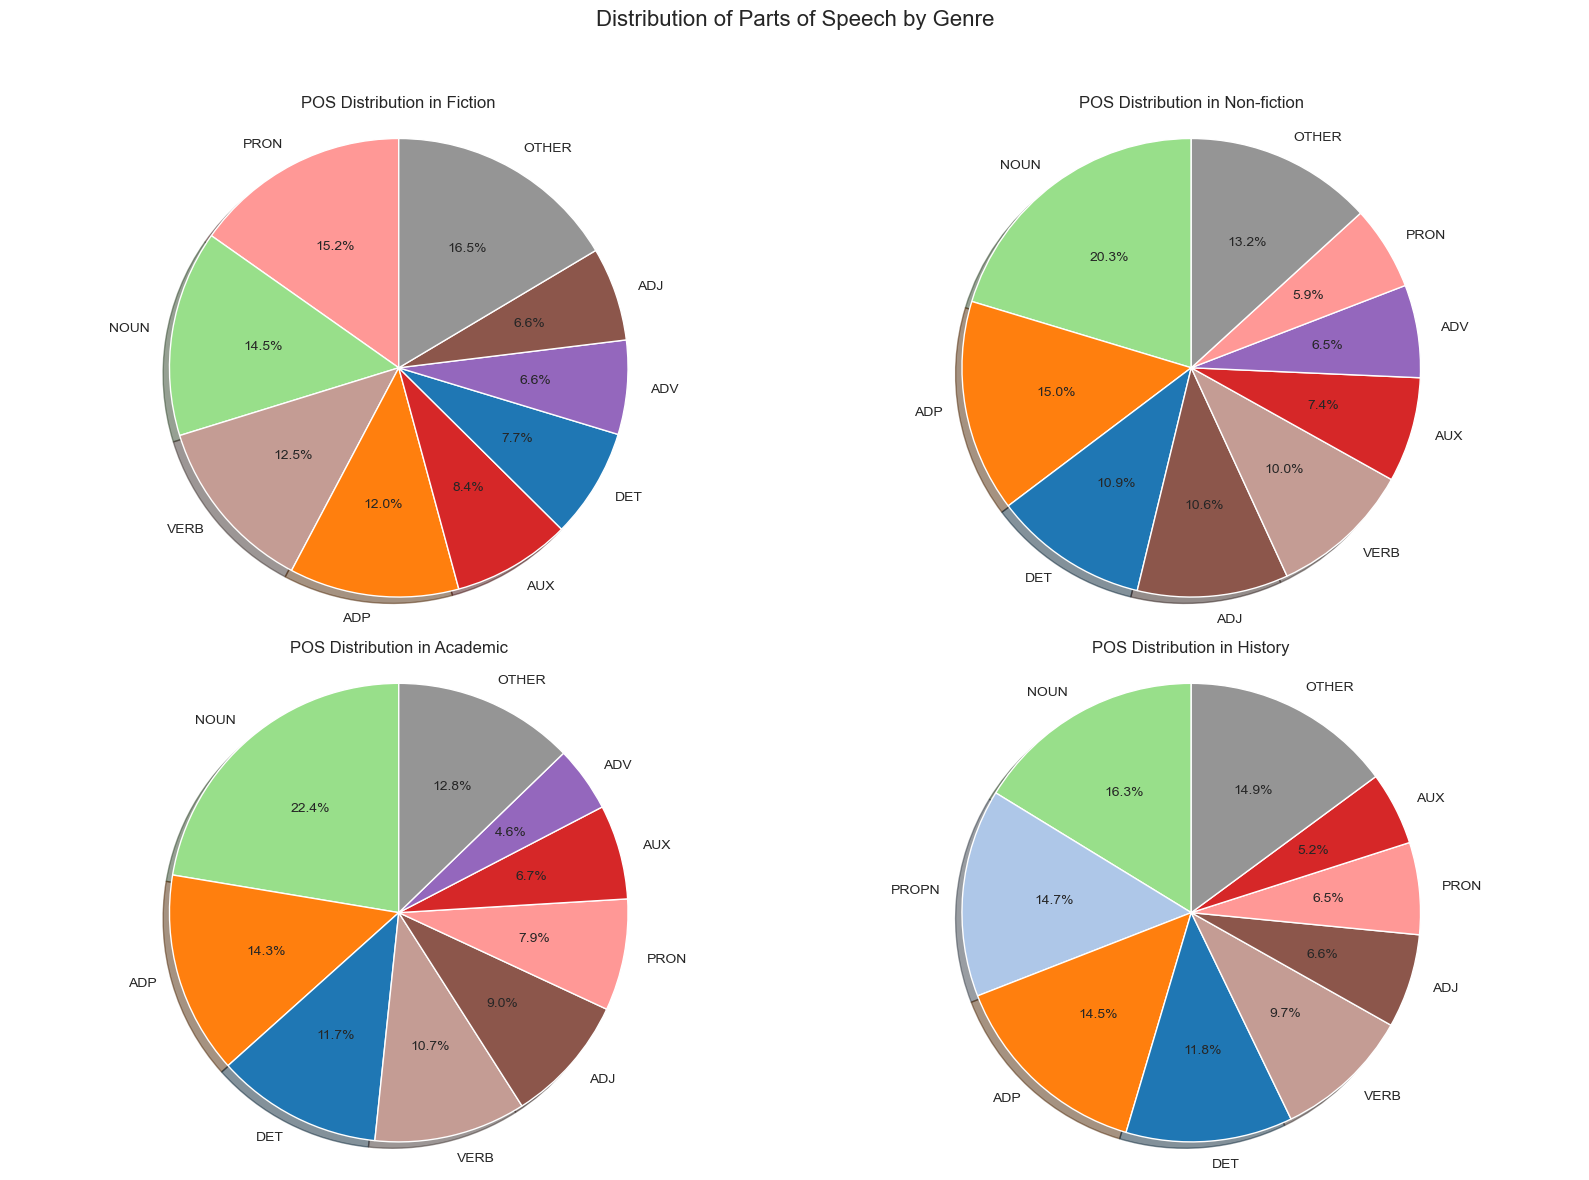

In [43]:
# 4.4

def plot_pos_distribution(df):
    plt.figure(figsize=(16, 12))
    
    all_pos_tags = df['PoS'].unique()
    
    colors = plt.cm.tab20(np.linspace(0, 1, len(all_pos_tags)))
    color_map = dict(zip(all_pos_tags, colors))
    
    color_map['OTHER'] = plt.cm.Greys(0.5)
    
    for i, genre in enumerate(df['genre'].unique(), 1):
        plt.subplot(2, 2, i)
        
        # Filter by genre
        genre_df = df[df['genre'] == genre]
        
        # Count POS tags
        pos_counts = genre_df['PoS'].value_counts()
        
        # Keep top 8 POS tags for readability, combine the rest
        if len(pos_counts) > 8:
            others = pos_counts[8:].sum()
            pos_counts = pos_counts[:8]
            pos_counts['OTHER'] = others
        
        # Get colors for the POS tags in this genre
        pie_colors = [color_map[pos] for pos in pos_counts.index]
        
        # Create pie chart with consistent colors
        plt.pie(pos_counts, labels=pos_counts.index, autopct='%1.1f%%', 
                shadow=True, startangle=90, colors=pie_colors)
        plt.title(f'POS Distribution in {genre.capitalize()}')
        plt.axis('equal')
    
    plt.suptitle('Distribution of Parts of Speech by Genre', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_pos_distribution(df)